<a href="https://colab.research.google.com/github/anshulrath0re/Multiple_Linear_regression_from_scratch/blob/main/MLR_Sratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparing Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data ML/Student_Performance.csv')   #.values
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# X = data[:, :-1]
# y = data[:, -1]

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
X = X/[10,100,1,10,10]

In [ ]:
print(X)

[[0.7  0.99 1.   0.9  0.1 ]
 [0.4  0.82 0.   0.4  0.2 ]
 [0.8  0.51 1.   0.7  0.2 ]
 ...
 [0.6  0.83 1.   0.8  0.5 ]
 [0.9  0.97 1.   0.7  0.  ]
 [0.7  0.74 0.   0.8  0.1 ]]


In [ ]:
y = y/100

In [ ]:
print(y)

[0.91 0.65 0.45 ... 0.74 0.95 0.64]


# Data Splitting

adding new row for bias, Warning: run only once otherwise multiple rows will be added

In [ ]:
sample_size = X.shape[0]
row = np.ones((X.shape[0], 1), dtype = X.dtype)
X = np.hstack((X, row))

suffling and splitting

In [ ]:
indices = np.arange(sample_size)
np.random.seed(42)
np.random.shuffle(indices)
train_idx = indices[int(sample_size*0.2):]
test_idx = indices[:int(sample_size*0.2)]
X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]
# row = np.ones((X_train.shape[0], 1), dtype = X_train.dtype)
# X_train = np.hstack((X_train, row))

In [ ]:
print(X_train)

[[0.5  0.49 0.   0.7  0.5  1.  ]
 [0.2  0.48 1.   0.7  0.6  1.  ]
 [0.2  0.81 0.   0.7  0.2  1.  ]
 ...
 [0.9  0.48 0.   0.7  0.6  1.  ]
 [0.1  0.47 0.   0.9  0.   1.  ]
 [0.2  0.46 0.   0.6  0.6  1.  ]]


In [ ]:
print(y_train)

[0.36 0.25 0.59 ... 0.44 0.2  0.24]


In [ ]:
print(X_test)

[[0.5  0.69 0.   0.8  0.2  1.  ]
 [0.2  0.46 1.   0.4  0.8  1.  ]
 [0.7  0.56 1.   0.7  0.5  1.  ]
 ...
 [0.2  0.4  1.   0.7  0.2  1.  ]
 [0.3  0.83 0.   0.7  0.5  1.  ]
 [0.5  0.6  0.   0.8  0.4  1.  ]]


In [ ]:
print(y_test)

[0.51 0.2  0.46 ... 0.16 0.65 0.47]


Initializing Random Weights

In [ ]:
w = np.array([0,1,0,0,0,0])

In [ ]:
print(w)

[0 1 0 0 0 0]


# MSE Cost Function



In [ ]:
def MSE(w_mse, X_mse, y_mse):
  sample_size = X_mse.shape[0]
  y__ = X_mse.dot(w_mse)
  error_sq = (y__ - y_mse)**2
  return np.mean(error_sq)/2

In [ ]:
print(MSE(w,X_test,y_test))

0.013071675000000001


# Finding global maxima without gradient decent

In [ ]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [ ]:
print(w)

[ 0.28524839  1.0169882   0.00608617  0.04769415  0.01918314 -0.33921946]


In [ ]:
print(MSE(w, X_train, y_train))

0.00020848679247625036


#Batch Gradient Decent

In [ ]:
w_n = np.array([ 0.28524839,  1.0169882 ,  0.00608617 , 0.04769415 , 0.01918314 ,-0.33921946])

In [ ]:
w_n = np.array([0,1,0,0,0,0])

In [ ]:
# def Gradient_Decent(w, X, y, i =0):
for j in range (600):
  alpha = 0.5
  y_d = X_train.dot(w_n)
  dj_dw = (X_train.T.dot(y_train - y_d))/len(y_train)
  w_n = w_n +alpha*dj_dw

In [ ]:
# print(MSE(w, X_train, y_train))
print(MSE(w_n, X_train, y_train))

0.00020861221486626996


In [ ]:
print(w_n)

[ 0.28522489  1.01687775  0.00608024  0.04758137  0.01916729 -0.33904442]


# Mini batch Gradient decent


In [ ]:
wn = np.array([0,1,0,0,0,0])

In [ ]:
for j in range(10):
  for i in range(800):
    alpha = 0.01
    Xb = X_train[i*10 : (i+1)*10]
    yb = y_train[i*10 : (i+1)*10]
    djdw = Xb.T.dot(Xb.dot(wn) - yb)
    wn = wn -alpha*djdw

In [ ]:
print(MSE(wn, X_train, y_train))

0.0002133471596980244


In [ ]:
print(wn)

[ 0.28609016  1.01748584  0.0067688   0.04935102  0.01740859 -0.337551  ]


# Stochastic Gradient Decent

In [ ]:
w_s = np.array( [0,1,0,0,0,0])

In [ ]:
for j in range(2):
  alpha = 0.01
  for i in range(8000):
    x = X_train[i]
    ytemp = y_train[i]
    dj__dw = x.T.dot(x.dot(w_s) - ytemp)
    w_s = w_s - alpha*dj__dw

In [ ]:
print(w_s)

[ 0.28618879  1.01756249  0.00687152  0.0493382   0.01752375 -0.33754495]


In [ ]:
print(MSE(w_s, X_train, y_train))

0.0002197838129068729


# Test Data Visualisation

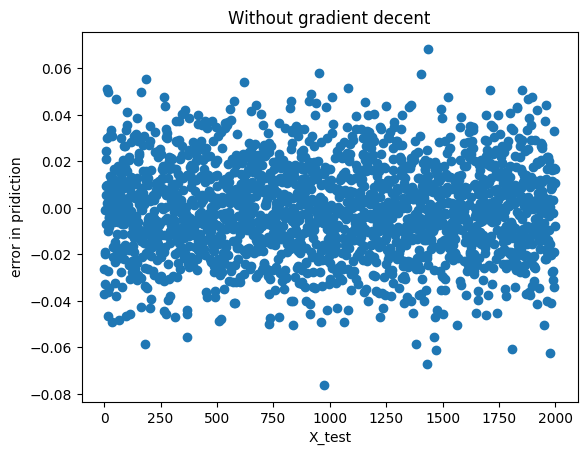

In [ ]:
y_d = X_test.dot(w)
plt.figure()
plt.scatter(range(2000),y_test- y_d)
plt.xlabel("X_test")
plt.ylabel("error in pridiction")
plt.title("Without gradient decent")
plt.show()

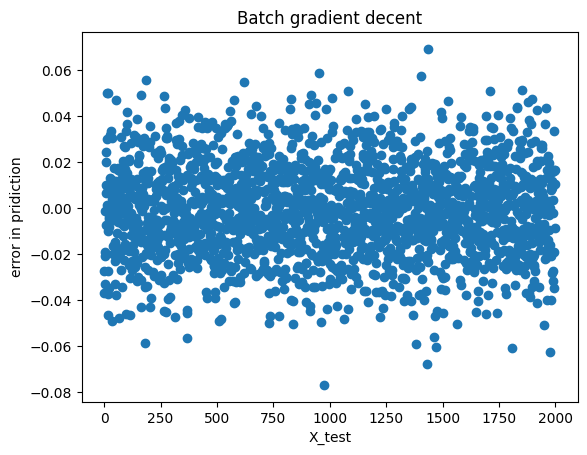

In [ ]:
y_dn = X_test.dot(w_n)
plt.figure()
plt.scatter(range(2000),y_test- y_dn)
plt.xlabel("X_test")
plt.ylabel("error in pridiction")
plt.title("Batch gradient decent")
plt.show()

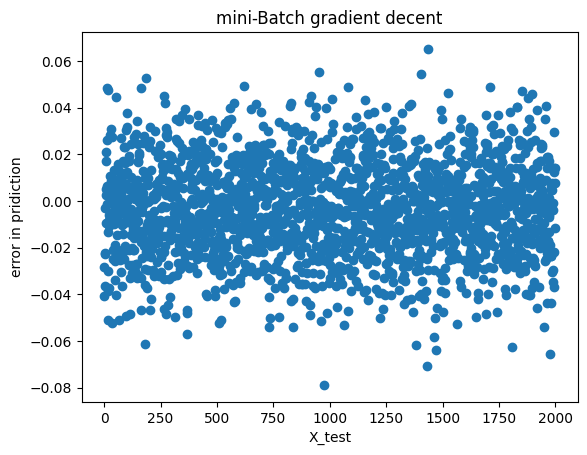

In [ ]:
y_dn = X_test.dot(wn)
plt.figure()
plt.scatter(range(2000),y_test- y_dn)
plt.xlabel("X_test")
plt.ylabel("error in pridiction")
plt.title("mini-Batch gradient decent")
plt.show()

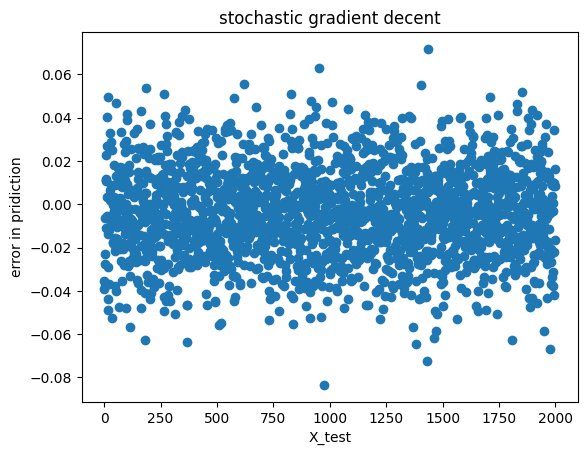

In [ ]:
y_ds = X_test.dot(w_s)
plt.figure()
plt.scatter(range(2000),y_test- y_ds)
plt.xlabel("X_test")
plt.ylabel("error in pridiction")
plt.title("stochastic gradient decent")
plt.show()

True vs predicted value for test set

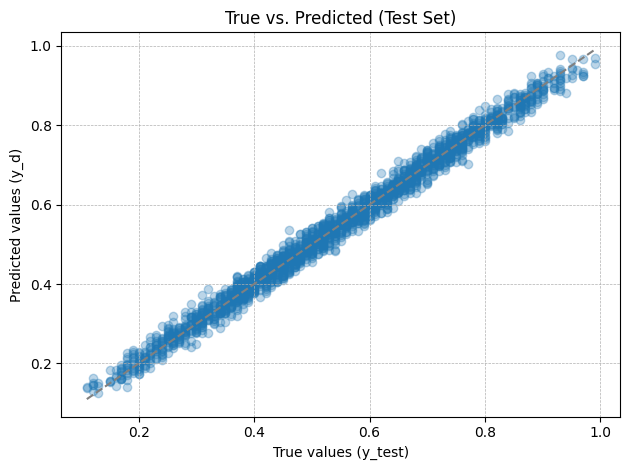

In [ ]:
min_val = min(y_test.min(), y_d.min())
max_val = max(y_test.max(), y_d.max())

# Plot
plt.figure()
plt.scatter(y_test, y_d, alpha=0.3)

plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_d)')
plt.title('True vs. Predicted (Test Set)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()